In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def draw_hsv(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.uint8)
    hsv[..., 1] = 255

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(rgb)
    plt.show()

# Assuming 'flow' is your h x w x 2 numpy array:
# draw_hsv(flow)


In [6]:
data = np.load("predictions/optflow_371.npy")
data.shape

(1, 256, 256, 2)

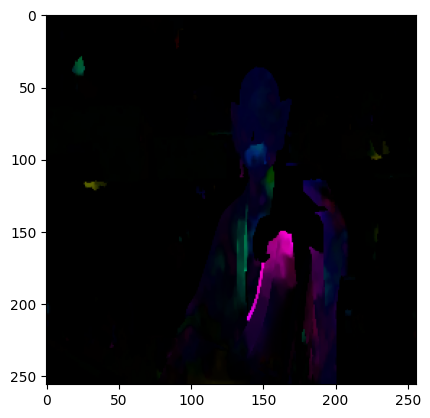

In [26]:
draw_hsv(np.load("predictions/optflow_290.npy")[0])

In [14]:
data[0][:,:,0]

array([[ 7.0273876e-05,  2.0861626e-05,  1.9562244e-04, ...,
         6.3753128e-04,  1.7166138e-05, -2.5510788e-05],
       [ 3.0088425e-04, -4.0590763e-05,  4.6133995e-04, ...,
         2.7065277e-03,  5.6838989e-04, -5.1641464e-04],
       [ 8.3065033e-04, -4.3869019e-05,  5.5313110e-04, ...,
         6.1874390e-03,  2.2392273e-03, -2.3899078e-03],
       ...,
       [ 6.6161156e-05,  9.3460083e-05, -3.5476685e-04, ...,
         3.5464764e-06,  3.3378601e-06,  2.5629997e-06],
       [ 3.8504601e-05, -3.5285950e-05, -7.4577332e-04, ...,
         1.9371510e-06,  1.7881393e-06,  1.3709068e-06],
       [-6.9141388e-05, -4.7206879e-04, -1.7757416e-03, ...,
         2.3245811e-06,  1.7583370e-06,  1.0430813e-06]], dtype=float32)

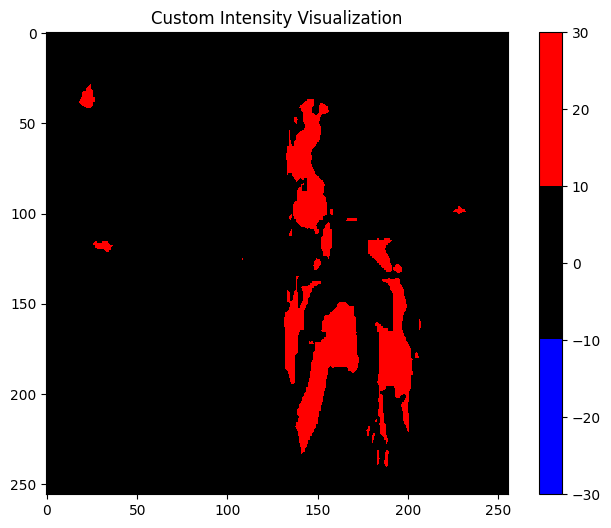

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example data
# h, w = 100, 100
# data = np.random.uniform(-20, 20, (h, w))  # Generate example data ranging from -20 to 20

# Define a custom colormap
# Colors outside -10 to 10 are mapped across a visible spectrum, and -10 to 10 is black
colors = [(0, "blue"),  # values less than -10
          (1/3, "blue"),  # Normalized position for -10, given the range [-30, 30]
          (1/3, "black"),  # Start of black
          (2/3, "black"),  # End of black, small increment to ensure a sharp transition
          (2/3, "red"),  # Transition out of black
          (1, "red")]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Normalizer
norm = mcolors.Normalize(vmin=-30, vmax=30)

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow((data[0][:,:,0]**2 + data[0][:,:,1]**2)**0.5, cmap=cmap, norm=norm)
plt.colorbar()
plt.title('Custom Intensity Visualization')
plt.show()


(256, 256, 3) (256, 256, 1)


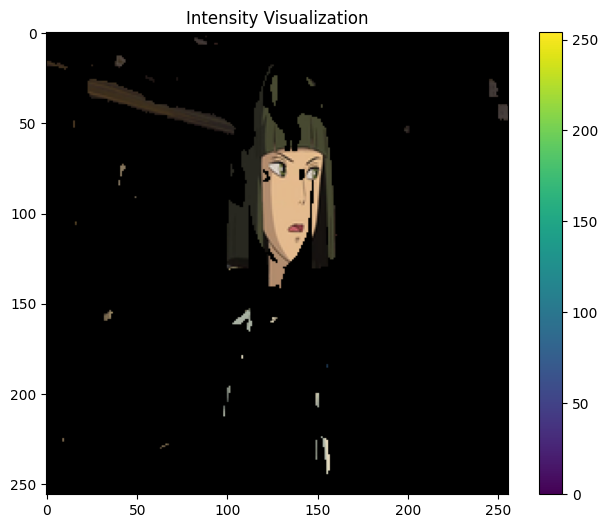

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data = np.load("predictions/optflow_371.npy")
a = (data[0][:,:,0]**2 + data[0][:,:,1]**2)**0.5
a = (a>=10).astype(np.uint8)
a = np.expand_dims(a, -1)

img = np.array(Image.open("predictions/image_orig_371.png"))

print(img.shape, a.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(img*a, cmap='viridis')  # You can change 'viridis' to other colormaps like 'jet', 'plasma', etc.
plt.colorbar()  # Show color bar indicating the scale
plt.title('Intensity Visualization')
plt.show()
